In [1]:
using DataFrames
using Plots
using Colors
using CSV
using MultivariateStats

In [2]:
sum_data = CSV.read("sum_data_100.csv", DataFrame)
tr = Matrix(sum_data[!, [:w1, :w2, :w3, :w4]])
M = fit(PCA, transpose(tr); maxoutdim=2)
pca = predict(M, transpose(tr))
pca1 = pca[1, :]
pca2 = pca[2, :]
sum_data[!, :pca1] = pca1
sum_data[!, :pca2] = pca2

100-element Vector{Float64}:
  0.15024867703458525
  0.0437269059047527
  0.023527292838613118
  0.08021392656497976
 -0.2090138612733675
  0.09523464060543689
  0.098344741199221
  0.07273129884411668
 -0.14821262769510002
 -0.13593892393664767
  ⋮
 -0.1183673045918469
  0.12297819135239667
  0.07766638065600956
  0.36268658153599637
  0.06288446720070985
  0.2667957143950698
 -0.25792155907082837
 -0.07606136185322611
 -0.01051025471507763

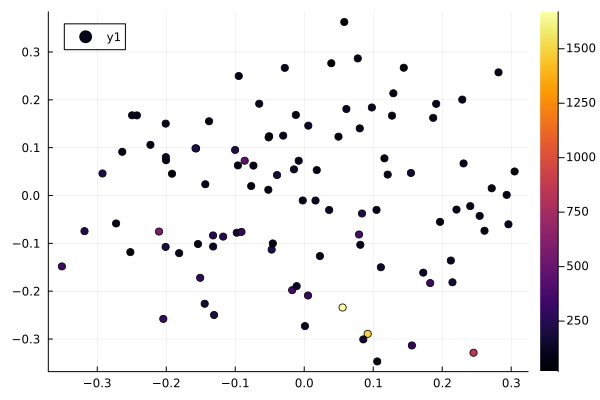

In [3]:
#Plot PCA colored by titer
plot(sum_data.pca1, sum_data.pca2, seriestype=:scatter, zcolor=sum_data.bcar_tot)

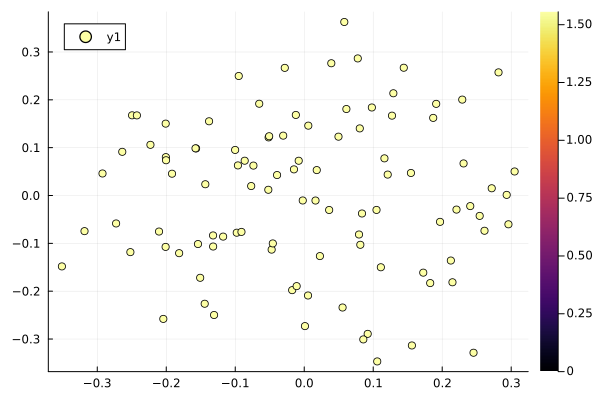

In [4]:
#Plot PCA colored by final growth rate 
plot(sum_data.pca1, sum_data.pca2, seriestype=:scatter, zcolor=sum_data.final_lam)

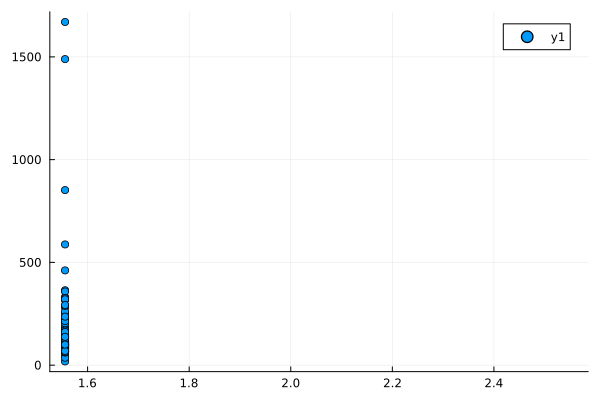

In [5]:
#Plot growth rate vs. titer
plot(sum_data.final_lam, sum_data.bcar_tot, seriestype=:scatter)

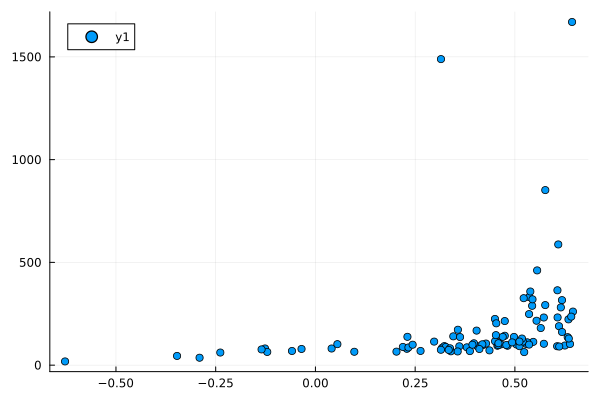

In [6]:
#Plot delta growth rate (burden) vs. titer
plot(sum_data.delta_lam, sum_data.bcar_tot, seriestype=:scatter)

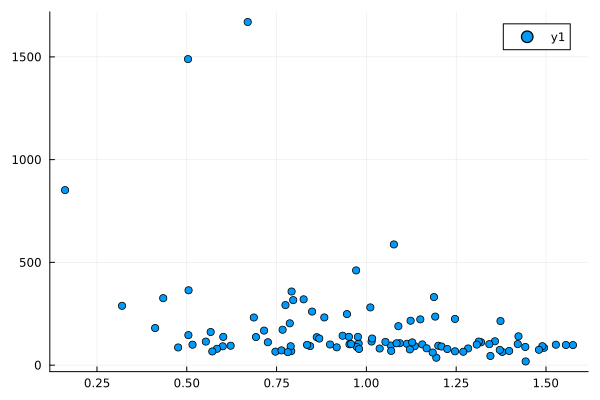

In [7]:
#Plot total W vs. titer
plot(sum_data.w_tot, sum_data.bcar_tot, seriestype=:scatter)

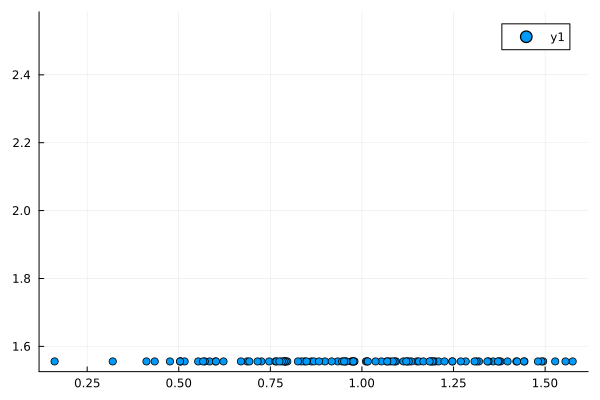

In [8]:
#Plot total W vs. growth rate
plot(sum_data.w_tot, sum_data.final_lam, seriestype=:scatter)

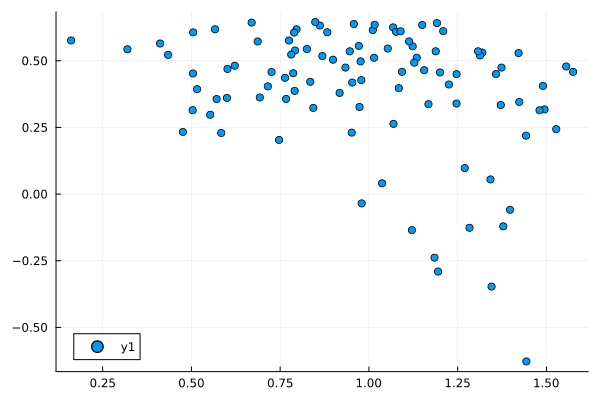

In [9]:
#Plot total W vs. burden
plot(sum_data.w_tot, sum_data.delta_lam, seriestype=:scatter)

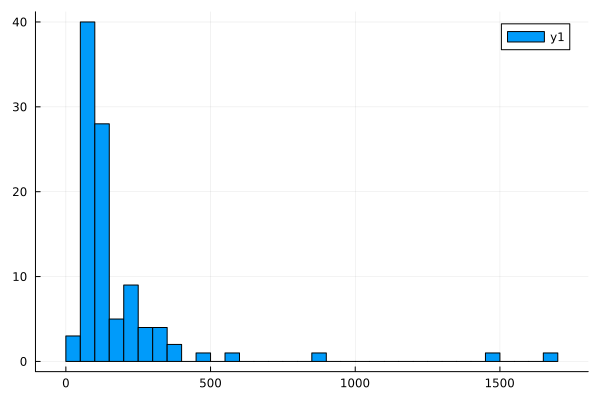

In [10]:
histogram(sum_data.bcar_tot)

In [16]:
ode_data = CSV.read("sim_ode_data_100.csv", DataFrame)
fba_data = CSV.read("sim_fba_data_100.csv", DataFrame)

8640100×5 DataFrame
     Row │ time          v_in_fpp  v_in_ipp      lam       W                   ⋯
         │ Float64       Float64   Float64       Float64   String              ⋯
─────────┼──────────────────────────────────────────────────────────────────────
       1 │  0.0               0.0  -8.31231e-16  1.5556    [0.3333333333333333 ⋯
       2 │  0.000277778       0.0  -8.31231e-16  1.48723   [0.3333333333333333
       3 │  0.000555556       0.0  -8.31231e-16  1.41912   [0.3333333333333333
       4 │  0.000833333       0.0  -8.31231e-16  1.35141   [0.3333333333333333
       5 │  0.00111111        0.0  -8.31231e-16  1.28426   [0.3333333333333333 ⋯
       6 │  0.00138889        0.0  -8.31231e-16  1.21782   [0.3333333333333333
       7 │  0.00166667        0.0  -8.31231e-16  1.15225   [0.3333333333333333
       8 │  0.00194444        0.0  -8.31231e-16  1.08769   [0.3333333333333333
    ⋮    │      ⋮           ⋮           ⋮           ⋮                      ⋮   ⋱
 8640094 │ 23.9983            0.0  -8.31231e-16  1.5556    [0.1496496496496496 ⋯
 8640095 │ 23.9986            0.0  -8.31231e-16  1.5556    [0.1496496496496496
 8640096 │ 23.9989            0.0  -8.31231e-16  1.5556    [0.1496496496496496
 8640097 │ 23.9992            0.0  -8.31231e-16  1.5556    [0.1496496496496496
 8640098 │ 23.9994            0.0  -8.31231e-16  1.5556    [0.1496496496496496 ⋯
 8640099 │ 23.9997            0.0  -8.31231e-16  1.5556    [0.1496496496496496
 8640100 │ 24.0               0.0  -8.31231e-16  1.5556    [0.1496496496496496
                                               1 column and 8640085 rows omitted

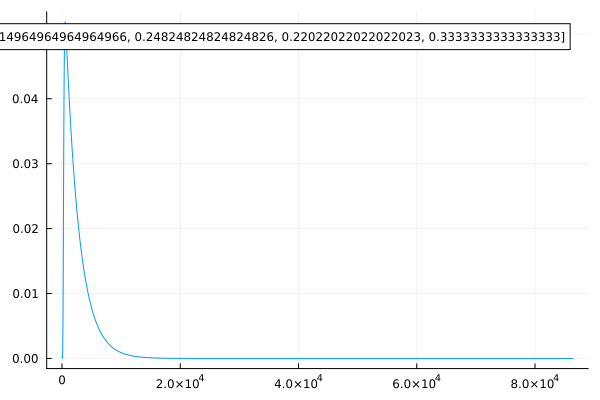

In [17]:
for W in unique(ode_data.W)
    equals_W(w::String) = w == W
    data = filter(:W => equals_W, ode_data)
    plot(data.bcar, label="W = $W")
end
plot!(legend=true)

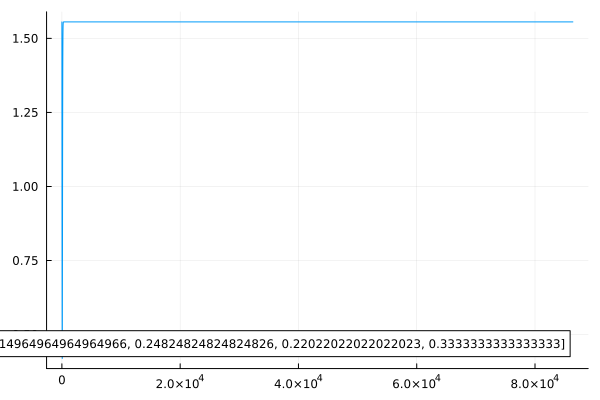

In [20]:
for W in unique(fba_data.W)
    equals_W(w::String) = w == W
    data = filter(:W => equals_W, fba_data)
    plot(data.lam, label="W = $W")
end
plot!(legend=true)